## **1. Kaggle GPU configuration**

In Kaggle, you have 36 hours/week.

To enable GPU hardware accelerator, just **Select the Settings tab. Then select the checkbox for Enable GPU. Verify the GPU is attached to your kernel in the console bar, where it should show GPU ON next to your resource usage metrics**.

## **2. Requirements**

This notebook requires the following libraries, 
torch, torchvision, scikit-image, numpy, glob, tqdm, random, itertools, matplotlib. 

You can install them in Kaggle using **pip** like: 

!pip install torch torchvision

You can install all other needed packages using the methodology.

In [1]:
!pip install torch torchvision scikit-image numpy glob2 tqdm matplotlib tifffile imagecodecs 

## **3. Upload your dataset**

This example (UNet model) is trained on the ISPRS Potsdam dataset. We use the IRRG tiles (8bit format). Make sure that the Potsdam data is in your Kaggle input. Please see the figure below for more details
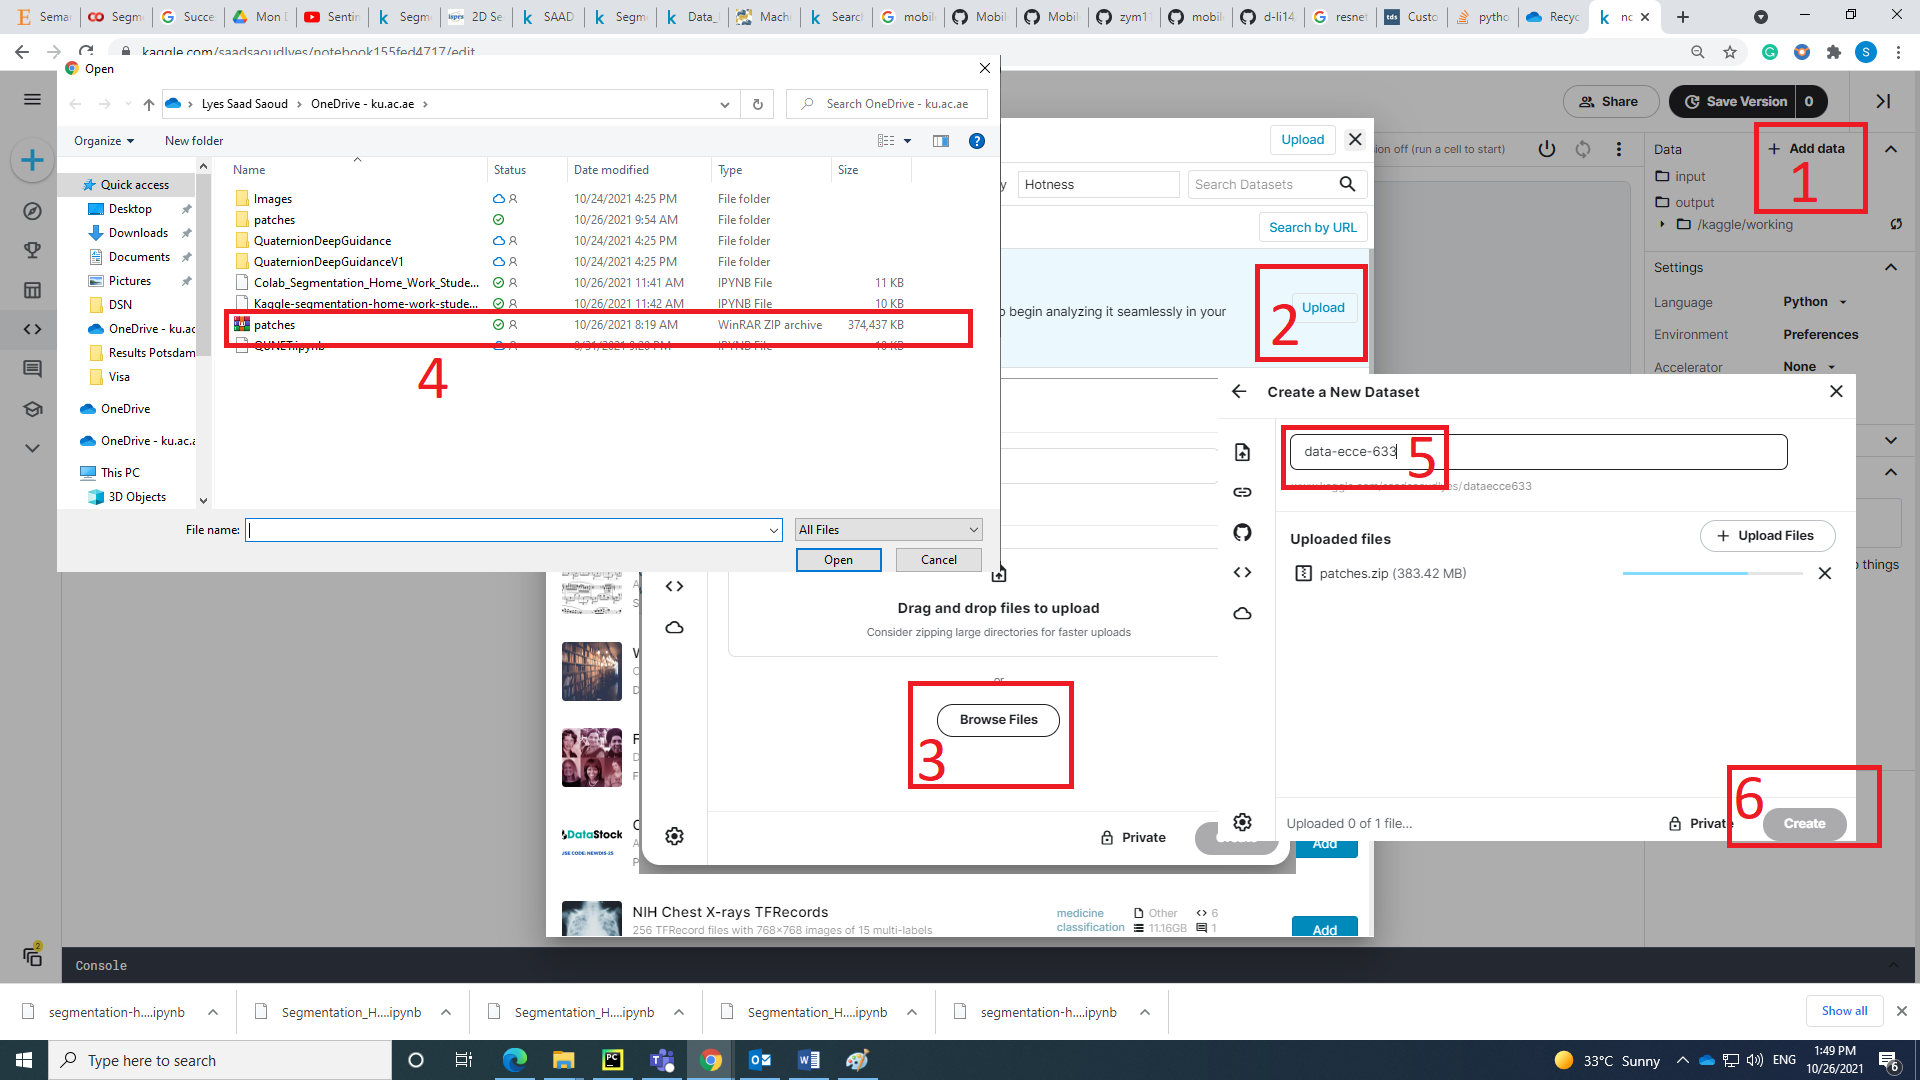
> # Please name the uploaded data like: data-ecce-633


## **4. Import the necessary packages:**
numpy, io, glob, tqdm_notebook, confusion_matrix, random, itertools, matplotlib.pyplot, torch, torch.nn,  torch.nn.functional, torch.utils.data, torch.optim, torch.optim.lr_scheduler, torch.nn.init

In [2]:
import numpy as np
from skimage import io
from glob import glob
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix
import random
import itertools
import matplotlib.pyplot as plt
# %matplotlib inline
# Torch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
import torch.optim.lr_scheduler
import torch.nn.init
from torch.autograd import Variable
import os
from IPython.display import clear_output
import tifffile as tiff 

## **5. Initialization:**

In [3]:
# Parameters
IN_CHANNELS =  3                          # Number of input channels (e.g. RGB)
MAIN_FOLDER  =    "../input/data-ecce-633/patches/"   # Your "/path/to/the/Images/folder/"
BATCH_SIZE =   10            # Number of samples in a mini-batch, example 10
LABELS = ["roads", "buildings", "low veg.", "trees", "cars", "clutter"] # Label names
N_CLASSES = len(LABELS)                   # Number of classes
weights = torch.ones(N_CLASSES)           # Weights for class balancing
DATA_FOLDER = MAIN_FOLDER + 'Images/Image_{}.tif'
LABELS_FOLDER = MAIN_FOLDER + 'Labels/Label_{}.tif'

## **6. Functions you may need:**

In [4]:
# Let's define the standard ISPRS color palette
palette = {0 : (255, 255, 255), # Impervious surfaces (white)
           1 : (0, 0, 255),     # Buildings (blue)
           2 : (0, 255, 255),   # Low vegetation (cyan)
           3 : (0, 255, 0),     # Trees (green)
           4 : (255, 255, 0),   # Cars (yellow)
           5 : (255, 0, 0),     # Clutter (red)
           6 : (0, 0, 0)}       # Undefined (black)
invert_palette = {v: k for k, v in palette.items()}
def convert_from_color(arr_3d, palette=invert_palette):
    """ RGB-color encoding to grayscale labels """ '(From 0 to 6)'
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)
    for c, i in palette.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
        arr_2d[m] = i
    return arr_2d
class Load_dataset(torch.utils.data.Dataset):
    def __init__(self, ids):
        super(Load_dataset, self).__init__()
        # List of files
        self.data_files = [DATA_FOLDER.format(id) for id in ids]
        self.label_files = [LABELS_FOLDER.format(id) for id in ids]
        # Sanity check : raise an error if some files do not exist
        for f in self.data_files + self.label_files:
            if not os.path.isfile(f):
                raise KeyError('{} is not a file !'.format(f))
    def __len__(self):
        return len(self.data_files) # the length of the used data
    
    def __getitem__(self, idx):
#         Pre-processing steps
        #     # Data is normalized in [0, 1]
        self.data = 1/255 * np.asarray(io.imread(self.data_files[idx]).transpose((2,0,1)), dtype='float32')
        self.label = np.asarray(convert_from_color(io.imread(self.label_files[idx])), dtype='int64')
        data_p, label_p = self.data,  self.label
        # Return the torch.Tensor values
        return (torch.from_numpy(data_p),
                torch.from_numpy(label_p))

def CrossEntropy2d(input, target, weight=None, size_average=True):
    """ 2D version of the cross entropy loss """
    dim = input.dim()
    if dim == 2:
        return F.cross_entropy(input, target, weight, size_average)
    elif dim == 4:
        output = input.view(input.size(0), input.size(1), -1)
        output = torch.transpose(output, 1, 2).contiguous()
        output = output.view(-1, output.size(2))
        target = target.view(-1)
        return F.cross_entropy(output, target, weight, size_average)
    else:
        raise ValueError('Expected 2 or 4 dimensions (got {})'.format(dim))
        
def metrics(predictions, gts, label_values=LABELS):
    cm = confusion_matrix(
        gts,
        predictions,
        range(len(label_values)))
    print("Confusion matrix :")
    print(cm)
    print("---")
    # Compute global accuracy
    total = sum(sum(cm))
    accuracy = sum([cm[x][x] for x in range(len(cm))])
    accuracy *= 100 / float(total)
    print("{} pixels processed".format(total))
    print("Total accuracy : {}%".format(accuracy))
    return accuracy

# **7. Selecting training and testing data**

In [5]:
train_ids =list(range(0, 2000))
test_ids =  list(range(2000,2400))

# **8. Implement the Unet model**


# **9.Training:**

# **10. Testing:**